# 基础


### 求三点是否共线

In [58]:
def isBoomerang( points:list)->bool:
    '''
    求三点是否共线

    :type points: List[List[int]]
    :rtype: bool

    '''
    #用两条线的数量积
    x1= points[1][0]-points[0][0] 
    x2= points[2][0]-points[1][0]
    y1= points[1][1]-points[0][1]
    y2= points[2][1]-points[1][1]
    
    if x1*y2-x2*y1==0:
        return False

    else:
        return True
                

print('test...isBoomerang')                
list1=[[1,1],[2,3],[3,2]]
print(list1)
print(isBoomerang(list1))



test...isBoomerang
[[1, 1], [2, 3], [3, 2]]
True


### 给定一个罗马数字，将其转换成整数。

In [59]:
def romanToInt(s: str) -> int:
    '''
    给定一个罗马数字，将其转换成整数。
    '''
    d = {'I': 1, 'IV': 4, 'V': 5, 'IX': 9, 'X': 10, 'XL': 40, 'L': 50, 'XC': 90,  'C': 100, 'CD': 400, 'D': 500, 'CM': 900, 'M': 1000}
    result = 0
    i = 0
    while i < len(s):
        #查看当前位和下一位的字符
        str1 = s[i:i+2] #！！注意这个前两位要到i+2，s[0,2]只有两个字符
        print(str1) 
        #如果当前位置是特殊情况，那么返回其在字典中对应值，并且下一次从特殊字符之后一位开始索引
        if str1 in d: 
            result += d.get(str1) 
            i += 2
        #如果当前位不是特殊情况，那么只返回当前位的数值
        else:
            result += d[s[i]] 
            i += 1
    return result

print('test...romanToInt')
test = "MCMXCIV"
print(test)
print(romanToInt(test))

test...romanToInt
MCMXCIV
MC
CM
XC
IV
1994


In [60]:
def romanToInt_answer(s: str) -> int:
    '''
    答案，给定一个罗马数字，将其转换成整数
    '''
    d = {'I':1, 'IV':3, 'V':5, 'IX':8, 'X':10, 'XL':30, 'L':50, 'XC':80, 'C':100, 'CD':300, 'D':500, 'CM':800, 'M':1000}
    return sum(d.get(s[max(i-1, 0):i+1], d[n]) for i, n in enumerate(s))
    #for i, n in enumerate(s)) 的i和n是对应字符串的位置和值
    #d.get(s[max(i-1, 0):i+1], d[n])表示获得s[[max(i-1, 0):i+1]的值，没找到则返回d[n]

print('test...romanToInt')
test = "MCMXCIV"
print(test)
print(romanToInt_answer(test))


test...romanToInt
MCMXCIV
1994


### 输入一个整数判断是否是回文数

In [61]:
def isPalindrome( x:int)->bool:
    '''
    输入一个整数判断是否是回文数
    '''
    strx=str(x)
    long=len(strx)
    errorflag=0

    for i in range(long//2): 

            if strx[i]==strx[long-i-1]:
                pass
            else:
                errorflag=1

    if errorflag==1:
        return False
    else:
        return True

print('test...isPalindrome')
test = 12321
print(test)
print(isPalindrome(test))

test...isPalindrome
12321
True


# 字符串

### 最长相同前缀

In [62]:
def longestCommonPrefix(strs:list)->str:
    """
    最长相同前缀
    """
    answer=''
    i=0
    nums=len(strs)
    minlong=9999
    for i in range(nums):
        if minlong>len(strs[i]):
            minlong=len(strs[i])
            print(minlong)
    for j in range(minlong):
        for i in range(nums):
            print(i, j)
            if strs[0][j]==strs[i][j]:
                appendflag=1
            else:
                print('不等')
                appendflag=0
                break
        if appendflag==1:
            answer= answer+strs[0][j]
            print(answer)

        else:
            break
    return  answer#自己的也修改对了   

print('test...longestCommonPrefix')
test = ["flower","flow","flight"]
print(test)
print(longestCommonPrefix(test))

test...longestCommonPrefix
['flower', 'flow', 'flight']
6
4
0 0
1 0
2 0
f
0 1
1 1
2 1
fl
0 2
1 2
2 2
不等
fl


In [63]:
def longestCommonPrefix_answer( strs:list)->str:
    """
    最长相同前缀
    """
    res = ""
    print(zip(*strs))
    for tmp in zip(*strs):#zip(*strs)表示每一个字母拉成一个元组
        tmp_set = set(tmp)#构建不重复的元组
        #set((1,2,3,4,1,2,3))
        #>>>{1, 2, 3, 4}
        if len(tmp_set) == 1:
            res += tmp[0]
        else:
            break
    return res


print('test...longestCommonPrefix')
test = ["flower","flow","flight"]
print(test)
print(longestCommonPrefix_answer(test))

test...longestCommonPrefix
['flower', 'flow', 'flight']
fl


### 查括号使用是否合法

In [64]:
def isValid( s:str) -> bool:
    """
    自己写的过不了最后一个数量巨大的括号，运行太慢了
    """
    dictkh={'(':0,')':1,'[':2,']':3,'{':4,'}':5}
    flag=1
    new_str = ""
    while flag:#找到符合的子项就再次循环
        flag=0
        for i in range(len(s)-1):#从第一个开始查找符合的子项
            print('len=%d'%len(s))
            print('i=%d'%i)
            if ( (dictkh.get(s[i])+1) == dictkh.get(s[i+1]) ) and (dictkh.get(s[i])%2==0):#如果符合删除符合的这两个
                new_str = ""
                for j in range(0, len(s)):#同s[0,2]，range(0,2)也只有0和1
                    if j != i and j != i+1:
                        new_str = new_str +s[j]
                        print(new_str)
                s=new_str
                flag=1
                break
    if s=="":
        return True
    else:
        return False
    
print('test...isValid')
test = "{[]})[]"
print(test)
print(isValid(test))

test...isValid
{[]})[]
len=7
i=0
len=7
i=1
{
{}
{})
{})[
{})[]
len=5
i=0
)
)[
)[]
len=3
i=0
len=3
i=1
)
False


In [65]:


def isValid_answer( s):
    """
    查括号使用是否合法的答案
    """
    dic = {'{': '}',  '[': ']', '(': ')', '?': '?'}
    stack = ['?']
    for c in s:
        if c in dic: stack.append(c)
        elif dic[stack.pop()] != c: return False 
    return len(stack) == 1

print('test...isValid')
test = "{[]})[]"
print(test)
print(isValid_answer(test))

test...isValid
{[]})[]
False


### 查找子字符串的位置

In [66]:


def strStr(haystack: str, needle: str) -> int:
    """
    查找子字符串的位置
    """
    if len(needle)==0:
        return 0
    else:
        for i in range(len(haystack)):
            print(i)          
            if  haystack[i]==needle[0]:
                p=i
                j=0
                for i in range(len(needle)):
                    if p<len(haystack):
                        if haystack[p]==needle[j]:
                            print(haystack[p])
                            p+=1
                            j+=1
                        else:
                            break
                    else:
                        break
                if j==len(needle):
                    return p-len(needle)

        else:
            return -1

print('test...strStr')
s1='issdissdop'
s2='issdo'
print(strStr(s1,s2))


test...strStr
0
i
s
s
d
1
2
3
4
i
s
s
d
o
4


# 数组

### 两数之和:给定一个整数数组 nums和一个整数目标值 target,请你在该数组中找出 和为目标值

In [67]:
def twoSum(nums:list, target:int)->list:
        '''
        两数之和:给定一个整数数组 nums和一个整数目标值 target,请你在该数组中找出 和为目标值
        target 的那 两个 整数，并返回它们的数组下标。你可以假设每种输入只会对应一个答案。
        但是，数组中同一个元素在答案里不能重复出现。你可以按任意顺序返回答案
        
        '''
        for i in range(len(nums)-1):
            for j in range(i+1,len(nums)):
                if nums[i]+nums[j]==target:
                #两层循环，第二层从第一次i的位置开始，这样避免同一个下标
                    return [i,j]


print('test...twoSum')                
list1=[2,7,11,15]
print(list1)
print(twoSum(list1,9))

test...twoSum
[2, 7, 11, 15]
[0, 1]


### 给定一个排序数组和一个目标值，在数组中找到目标值，并返回其索引。如果目标值不存在于数组中，返回它将会被按顺序插入的位置

In [68]:

def searchInsert(nums:list, target:int)-> int:
    """
    给定一个排序数组和一个目标值，在数组中找到目标值，
    并返回其索引。如果目标值不存在于数组中，返回它将会被按顺序插入的位置。
    """
    if len(nums)==1:
        if nums[0]>target:
            nums.insert(0,target)
            return 0
        elif nums[0]==target:
            return 0
        else:
            nums.insert(1,target)
            return 1

    elif nums[len(nums)-1]==target:    
        return len(nums)-1
    else:

        for i in range(len(nums)-1):
            if nums[0]>target:
                nums.insert(0,target)
                return 0
            else:    
                if nums[i]==target:
                    return i
                else:
                    if  nums[i]<target<nums[i+1]:
                        nums.insert(i+1,target)
                        return i+1
        nums.append(target)
        return len(nums)-1
        
print('test...searchInsert')
s1=[1,2,3,5,6,7]
s2=4
print(searchInsert(s1,s2))
print(s1)

test...searchInsert
3
[1, 2, 3, 4, 5, 6, 7]


### 给你一个 升序排列 的数组 nums ，请你 原地 删除重复出现的元素

In [69]:

def removeDuplicates( nums:list)-> int:
    """
    给你一个 升序排列 的数组 nums ，请你 原地 删除重复出现的元素，
    使每个元素 只出现一次 ，返回删除后数组的新长度。元素的】相对顺序】应该保持 一致 。
    :type nums: List[int]
    :rtype: int
    assert
    """
    i=0
    lens=len(nums)
    while i<lens-1:          
        if nums[i]==nums[i+1]:
            del nums[i]
            lens-=1
            continue
        i+=1

    return lens

print('test...removeDuplicates')
test = [1,2,2,3,3,3,4,4]
print(test)
print(removeDuplicates(test))
print(test)


test...removeDuplicates
[1, 2, 2, 3, 3, 3, 4, 4]
4
[1, 2, 3, 4]


### 返回最后一个单词的长度

In [70]:

def lengthOfLastWord(s:str)->int:
    """
    返回最后一个单词的长度
    """
    for i in range(len(s)):
        if  s[len(s)-1-i]!=' ':
            start=len(s)-1-i
            print(start)
            break
    for i in range(len(s)):
        if  (len(s)-1-i)<=start and s[len(s)-1-i]==' ':
            index=len(s)-i
            return i-(len(s)-1-start)
    return len(s)-(len(s)-1-start)

print('test...lengthOfLastWord')
s1= '  wd  wdwdw dwdw  fishc  '
print(lengthOfLastWord(s1))

test...lengthOfLastWord
22
5


Text(0, 0.5, '发现概率')

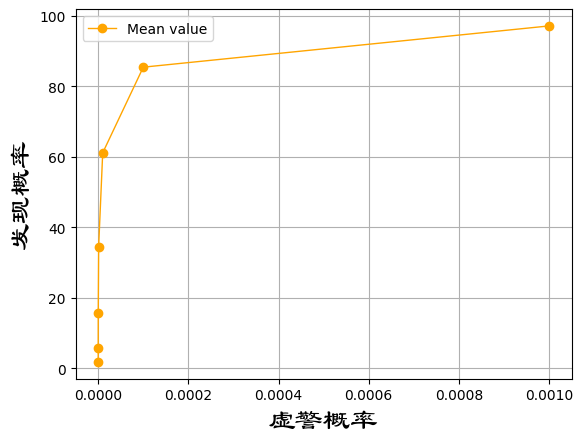

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
x = [0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.5]
data = [0.0029,0.00046,0.000072,0.000018,0.0000018,0.00000027,0.0000000034,0.0000000037]
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
data = [7.5,8.19,8.23,10.58,10,10.4,11.11,12,11.5,12.63,13.15,12.63,12.43,12.22,11.63,11.15]
x = [0.000000001,0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001]
data = [1.8,5.7,15.6,34.5,61.1,85.4,97.1]
y = [np.mean(i) for i in data]
plt.plot(x, y, linewidth=1, color="orange", marker="o",label="Mean value")
my_font=font_manager.FontProperties(fname="C:\Windows\Fonts\SIMLI.TTF",size=20)
plt.legend(["Mean value","Standard deviation"],loc="upper left")#设置线条标识
plt.grid()  # 设置网格模式
plt.xlabel("虚警概率",fontproperties=my_font)
plt.ylabel("发现概率",fontproperties=my_font)